In [1]:
import time
import numpy as np
import pandas as pd
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
with open('model/lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)


In [3]:
for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1

In [4]:
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
list_topic

[[0.035494488, 0.026652364, 0.60259175, 0.059402272, 0.21648578, 0.059373368],
 [0.278622, 0.06714439, 0.54005206, 0.017606834, 0.07225296, 0.024321767],
 [0.11121966, 0.010001538, 0.023806276, 0.20324218, 0.6403387, 0.011391605],
 [0.80063915, 0.029094314, 0.07719158, 0.039709408, 0.026180075, 0.027185543],
 [0.033126604, 0.23656176, 0.01903138, 0.061574817, 0.56062186, 0.08908362],
 [0.0350982, 0.7465349, 0.035038333, 0.11360475, 0.039282653, 0.030441185],
 [0.024975626, 0.110365815, 0.023449766, 0.09733195, 0.720407, 0.02346981],
 [0.18839464, 0.31186372, 0.03704187, 0.28942946, 0.12768787, 0.045582455],
 [0.9108552, 0.01650766, 0.011711805, 0.011631177, 0.03402015, 0.015274053],
 [0.019950993, 0.7875749, 0.030843839, 0.014026694, 0.12511462, 0.022489037],
 [0.047036037, 0.307564, 0.047420476, 0.106929444, 0.05455834, 0.43649176],
 [0.066520765, 0.11493565, 0.1155703, 0.06543883, 0.07892869, 0.5586058],
 [0.08010988, 0.11247933, 0.11456193, 0.45023733, 0.15040717, 0.092204385],
 [0.

In [5]:
topic_assignments = [topic.index(max(topic)) for topic in list_topic]

In [6]:
df = pd.DataFrame(list_topic)
print(df.info()) 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6531 non-null   float64
 1   1       6531 non-null   float64
 2   2       6531 non-null   float64
 3   3       6531 non-null   float64
 4   4       6531 non-null   float64
 5   5       6531 non-null   float64
dtypes: float64(6)
memory usage: 306.3 KB
None


,0,1,2,3,4,5
0,0.035494,0.026652,0.602592,0.059402,0.216486,0.059373
1,0.278622,0.067144,0.540052,0.017607,0.072253,0.024322
2,0.111220,0.010002,0.023806,0.203242,0.640339,0.011392
3,0.800639,0.029094,0.077192,0.039709,0.026180,0.027186
4,0.033127,0.236562,0.019031,0.061575,0.560622,0.089084
...,...,...,...,...,...,...
6526,0.051822,0.050537,0.048493,0.178873,0.624873,0.045403
6527,0.060200,0.107875,0.053167,0.312189,0.411099,0.055471
6528,0.035010,0.042009,0.030580,0.432117,0.421827,0.038457
6529,0.096552,0.095839,0.095855,0.505646,0.109766,0.096342


In [7]:
# คำสั่ง .values จะทำการดึงข้อมูลที่ไม่ใช่ header ออกมา
D = df.values

print(D.shape)
#ลบข้อมูลในแต่ละฟีเจอร์ด้วย mean ของฟีเจอร์นั้นๆ เพื่อปรับให้ค่า mean เป็น 0
X = D - D.mean(axis=0, keepdims=True)

# สเกลข้อมูลด้วย standard deviation 
X = X/D.std(axis=0,keepdims=True)

(6531, 6)


In [8]:
# กำหนดจำนวนของ PCs ได้ ในที่นี้กำหนดให้เป็น 2
pca = PCA(n_components=2)
# ทำการ fit ข้อมูล
pca.fit(X)

PCA(n_components=2)

In [9]:
# คำสั่ง transform จะทำการแปลงข้อมูล Raw data ให้กลายเป็นข้อมูลทีถูกแปลง(ข้อมูลที่ถูกบิดนั้นเอง)
X_pca = pca.transform(X)
print("Principal components: \n", pca.components_.T)

Principal components: 
 [[-0.3579649  -0.59550622]
 [-0.32825072  0.69007666]
 [-0.39159321 -0.20751697]
 [ 0.04523622  0.33240239]
 [ 0.7069931  -0.12410207]
 [ 0.32997241  0.01451114]]


In [11]:
#แสดงข้อมูลจุดที่ถูกแปลงเรียบร้อยแล้ว
print("Transformed data :\n", X_pca)
print(len(X_pca))

Transformed data :
 [[-0.92540377 -0.80654216]
 [-1.71395585 -1.3048802 ]
 [ 1.34521397 -0.10487597]
 ...
 [ 1.00365472  0.97826288]
 [ 0.06728366  1.27027625]
 [ 0.10680591  1.83073652]]
6531


In [21]:
exp_var = pca.explained_variance_ratio_
print("explained variance : ", pca.explained_variance_)
print("explained variance ratio : ", pca.explained_variance_ratio_)
print("Total variation explained : {0} = {1:.2f} %".format(exp_var, sum(pca.explained_variance_ratio_*100)))
print("Original shape (#instances, #features):   ", X.shape)
print("Transformed shape (#instances, #features):", X_pca.shape)

explained variance :  [1.6046863  1.40241976]
explained variance ratio :  [0.26740677 0.23370084]
Total variation explained : [0.26740677 0.23370084] = 50.11 %
Original shape (#instances, #features):    (6531, 6)
Transformed shape (#instances, #features): (6531, 2)


In [24]:
dpc = pd.DataFrame(pca.components_.T, index = ['0','1','2','3','4','5'], columns=[f'PC{n+1}' for n in range(2)])
dpc

,PC1,PC2
0,-0.357965,-0.595506
1,-0.328251,0.690077
2,-0.391593,-0.207517
3,0.045236,0.332402
4,0.706993,-0.124102
5,0.329972,0.014511


<AxesSubplot:>

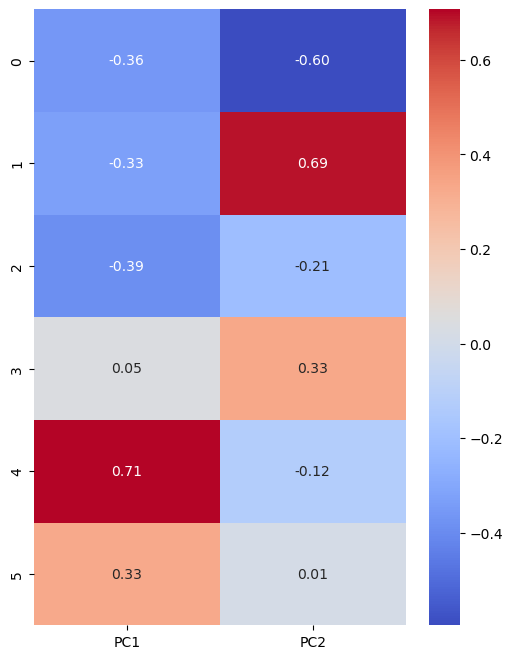

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,8))
sns.heatmap(dpc, cmap='coolwarm', annot=True, fmt='.2f')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


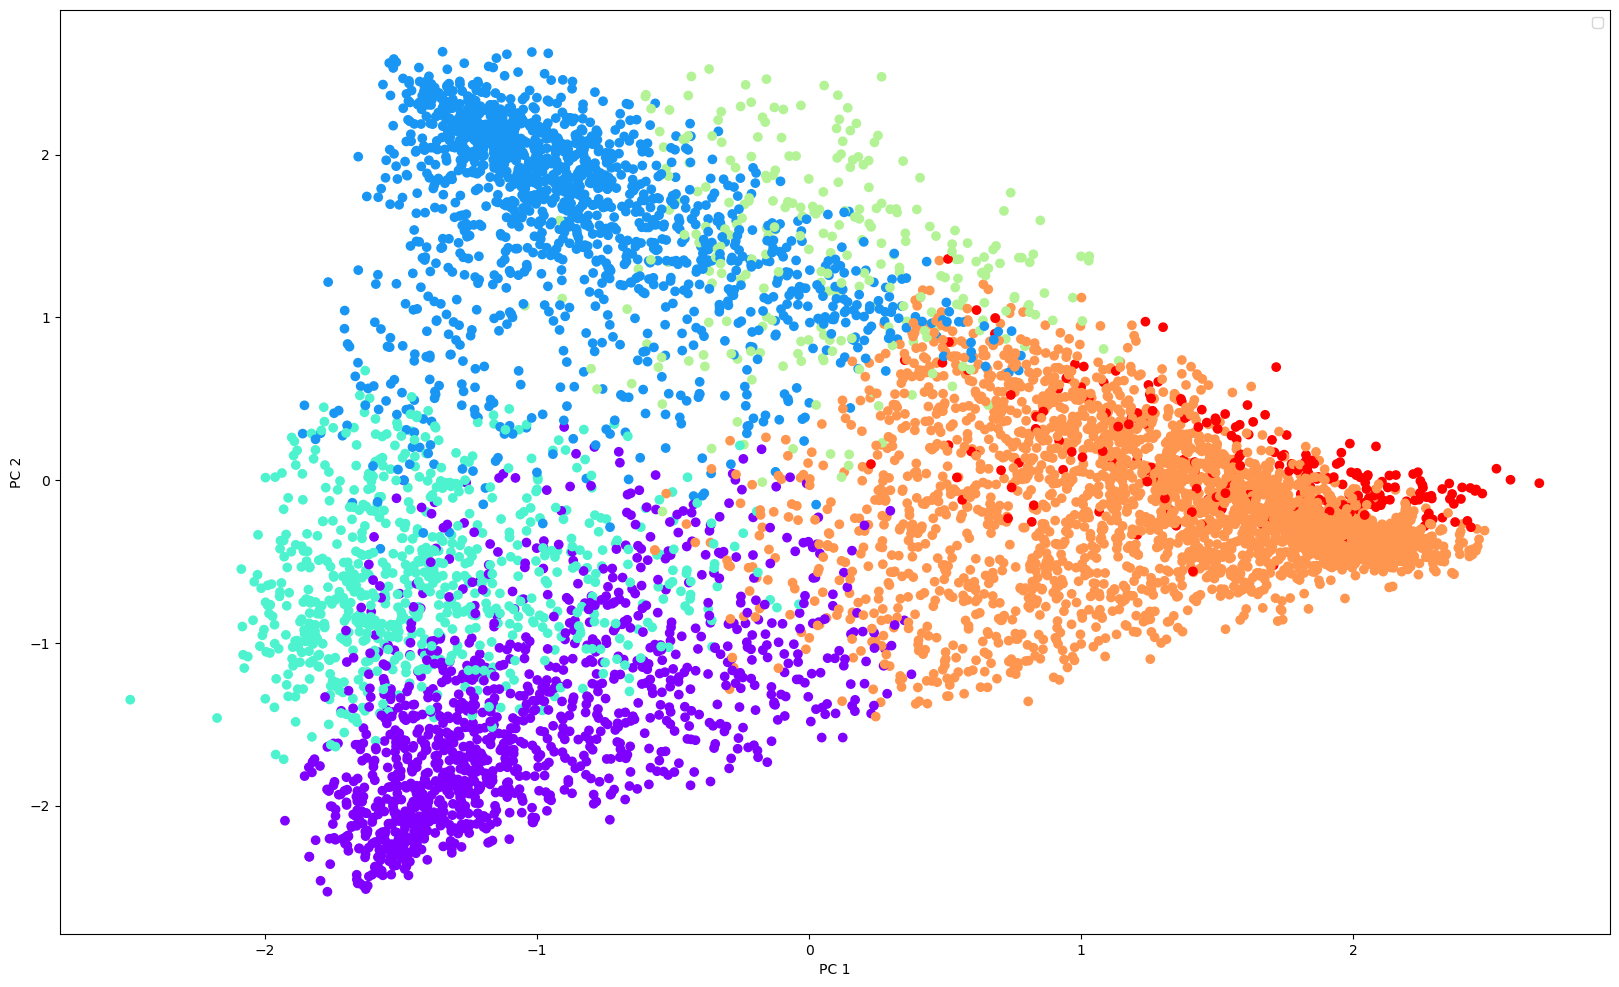

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.legend()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=topic_assignments, cmap='rainbow')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6531 samples in 0.013s...
[t-SNE] Computed neighbors for 6531 samples in 0.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6531
[t-SNE] Computed conditional probabilities for sample 2000 / 6531
[t-SNE] Computed conditional probabilities for sample 3000 / 6531
[t-SNE] Computed conditional probabilities for sample 4000 / 6531
[t-SNE] Computed conditional probabilities for sample 5000 / 6531
[t-SNE] Computed conditional probabilities for sample 6000 / 6531
[t-SNE] Computed conditional probabilities for sample 6531 / 6531
[t-SNE] Mean sigma: 0.069695
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.291191
[t-SNE] KL divergence after 300 iterations: 1.647705


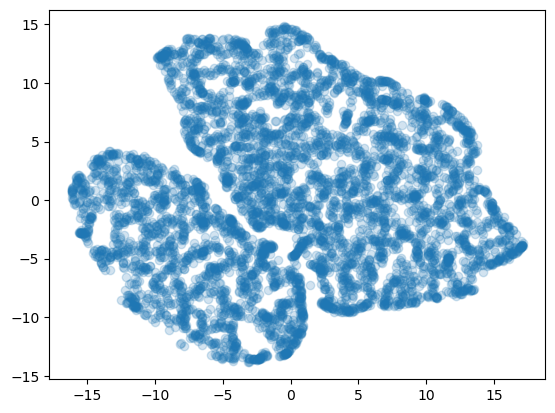

In [17]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=.2)
plt.show()

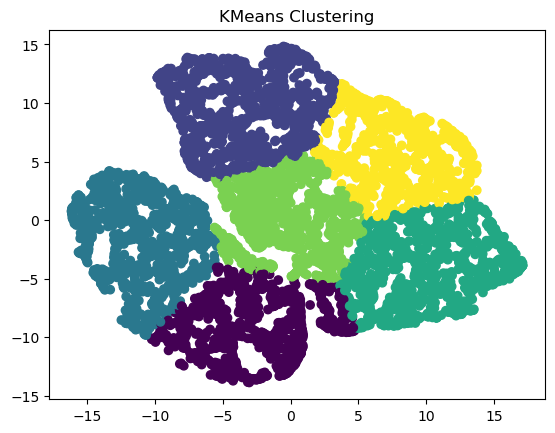

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0).fit(tsne_results)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering')
plt.show()